In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def euclidian_dist(X_train, X_test):
    dist = np.zeros((len(X_test), len(X_train)))
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            dist[i, j] = np.sqrt(np.sum((X_test.iloc[i] - X_train.iloc[j])**2))
    return dist

In [3]:
def knn_classify(dist_array, y_train, k):
    pred = []
    for dist in dist_array:
        k_nearest = dist.argsort()[:k]
        k_nearest_labels = y_train.iloc[k_nearest]
        pred.append(k_nearest_labels.value_counts().index[0])
    return np.array(pred)

In [4]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test) / len(y_test)

In [5]:
def accuracy_vs_k(dist_array, y_train, y_test, k_range):
    accuracy_list = []
    for k in k_range:
        y_pred = knn_classify(dist_array, y_train, k)
        accuracy_list.append(accuracy(y_pred, y_test))
    return accuracy_list

### Load

In [6]:
iris_df = pd.read_csv('iris.csv')
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Split Train-Test

In [7]:
# get distinct species name
species = iris_df['Species'].unique()
test = pd.DataFrame()
train = pd.DataFrame()
for s in species:
    species_df = iris_df[iris_df['Species'] == s]
    test = pd.concat([test, species_df.iloc[:3]])
    train = pd.concat([train, species_df.iloc[3:]])
test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica


## 1.a
First take 2 dimensions/features, that is, Sepal Length and Sepal Width.

In [8]:
col_a = ['SepalLengthCm', 'SepalWidthCm', 'Species']
train_a = train[col_a]
test_a = test[col_a]

In [9]:
X_train_a = train_a.iloc[:, :-1]
y_train_a = train_a.iloc[:, -1]
X_test_a = test_a.iloc[:, :-1]
y_test_a = test_a.iloc[:, -1]

### Plot

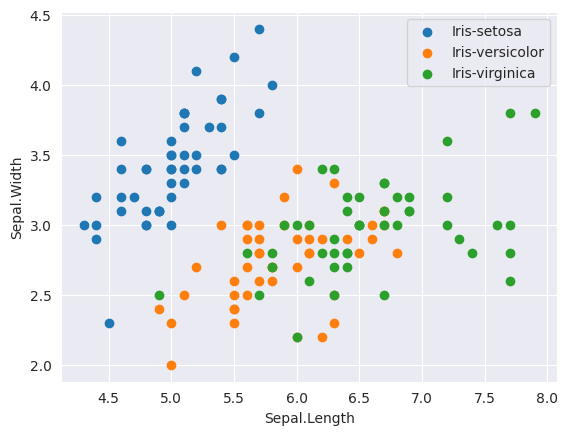

In [10]:
for s in species:
    species_df = train_a[train_a['Species'] == s]
    plt.scatter(species_df['SepalLengthCm'], species_df['SepalWidthCm'], label=s)
plt.xlabel('Sepal.Length')
plt.ylabel('Sepal.Width')
plt.legend()
plt.show()

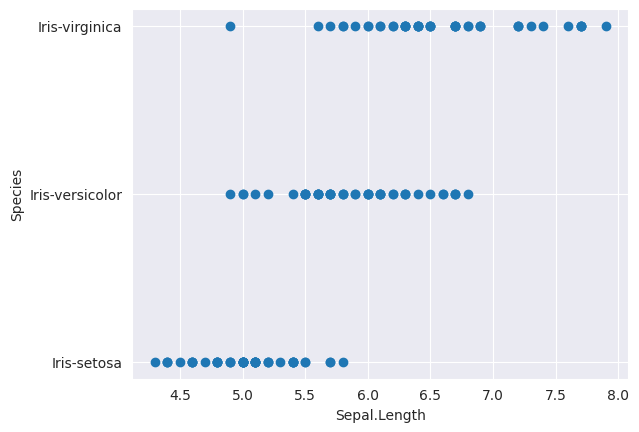

In [11]:
plt.scatter(train_a['SepalLengthCm'], train_a['Species'])
plt.xlabel('Sepal.Length')
plt.ylabel('Species')
plt.show()

**Inference:** General trend of SepalLength is setosa < versicolor < virginica

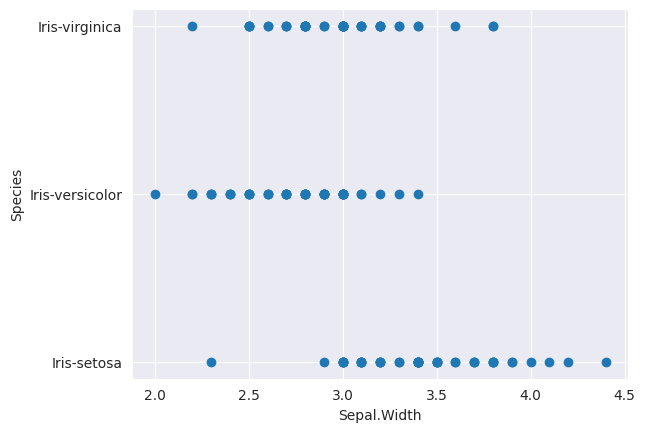

In [12]:
plt.scatter(train_a['SepalWidthCm'], train_a['Species'])
plt.xlabel('Sepal.Width')
plt.ylabel('Species')
plt.show()

**Inference:** General trend of SepalWidth is versicolor < virginica < setosa

### KNN

In [13]:
eucl_dist_a = euclidian_dist(X_train_a, X_test_a)
k = 5
y_pred_a = knn_classify(eucl_dist_a, y_train_a, k)
result_a = pd.DataFrame({'Actual': y_test_a, 'Predicted': y_pred_a, 'Correct': y_test_a == y_pred_a})
result_a

,Actual,Predicted,Correct
0,Iris-setosa,Iris-setosa,True
1,Iris-setosa,Iris-setosa,True
2,Iris-setosa,Iris-setosa,True
50,Iris-versicolor,Iris-virginica,False
51,Iris-versicolor,Iris-virginica,False
52,Iris-versicolor,Iris-virginica,False
100,Iris-virginica,Iris-virginica,True
101,Iris-virginica,Iris-versicolor,False
102,Iris-virginica,Iris-virginica,True


### Performance

In [14]:
print(f"Accuracy with k={k}: {accuracy(y_pred_a, y_test_a)}")

Accuracy with k=5: 0.5555555555555556


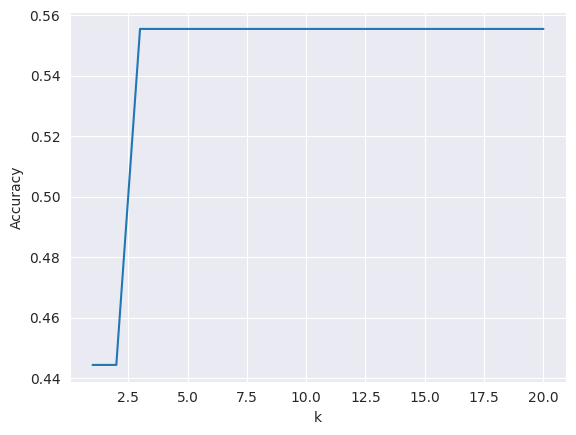

In [15]:
k_range = range(1, 21)
accuracy_list_a = accuracy_vs_k(eucl_dist_a, y_train_a, y_test_a, k_range)
plt.plot(k_range, accuracy_list_a)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

## 1.b
Now take all 4 dimensions/features.

In [16]:
col_b = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
train_b = train[col_b]
test_b = test[col_b]

In [17]:
X_train_b = train_b.iloc[:, :-1]
y_train_b = train_b.iloc[:, -1]
X_test_b = test_b.iloc[:, :-1]
y_test_b = test_b.iloc[:, -1]

### Plot

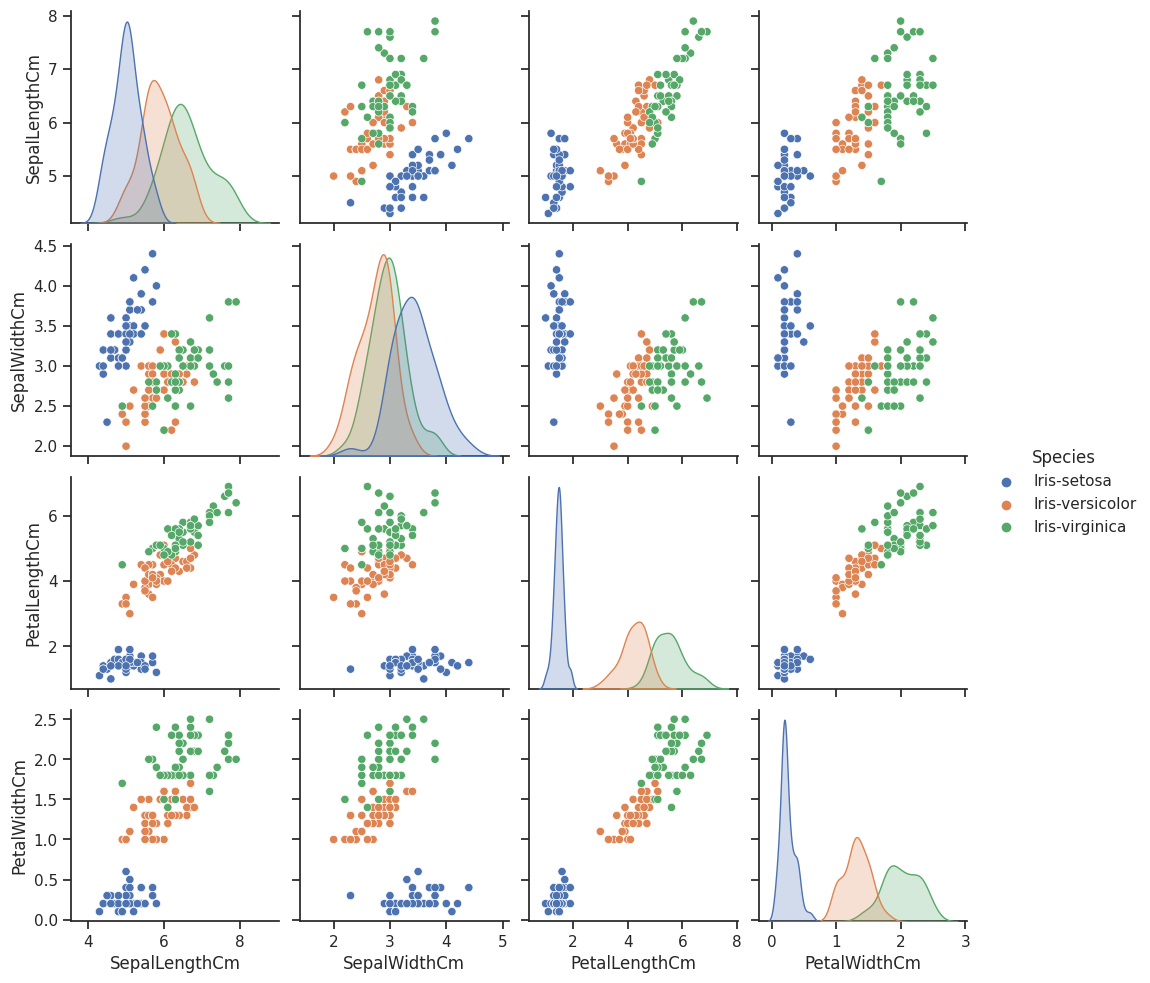

In [18]:
sns.set(style='ticks')
sns.pairplot(train_b, hue='Species')
plt.show()

### KNN

In [20]:
eucl_dist_b = euclidian_dist(X_train_b, X_test_b)
k = 5
y_pred_b = knn_classify(eucl_dist_b, y_train_b, k)
result_b = pd.DataFrame({'Actual': y_test_b, 'Predicted': y_pred_b, 'Correct': y_test_b == y_pred_b})
result_b

,Actual,Predicted,Correct
0,Iris-setosa,Iris-setosa,True
1,Iris-setosa,Iris-setosa,True
2,Iris-setosa,Iris-setosa,True
50,Iris-versicolor,Iris-versicolor,True
51,Iris-versicolor,Iris-versicolor,True
52,Iris-versicolor,Iris-versicolor,True
100,Iris-virginica,Iris-virginica,True
101,Iris-virginica,Iris-virginica,True
102,Iris-virginica,Iris-virginica,True


### Performance

In [21]:
print(f"Accuracy with k={k}: {accuracy(y_pred_b, y_test_b)}")

Accuracy with k=5: 1.0


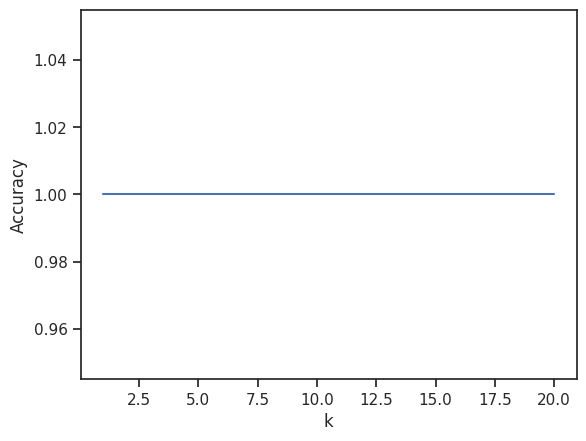

In [23]:
k_range = range(1, 21)
accuracy_list_b = accuracy_vs_k(eucl_dist_b, y_train_b, y_test_b, k_range)
plt.plot(k_range, accuracy_list_b)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()